In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


## Importing Required Libraries

In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.under_sampling import NearMiss

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

## Importing Data

In [3]:
alpha_data = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')

In [4]:
alpha_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Seperating dependent variable from independent variables
y = alpha_data['0']
del alpha_data['0']

## Data Insights

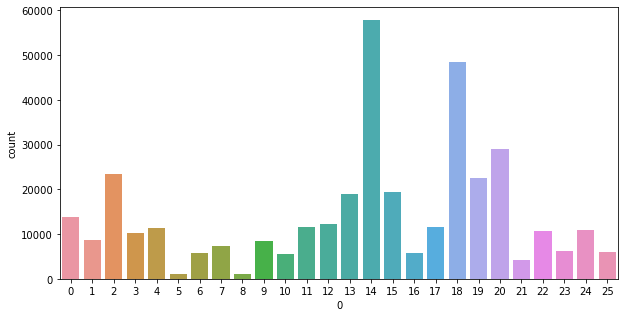

In [6]:
plt.figure(figsize = (10,5))
sns.countplot(y)

As We can clearly see our data is highly imbalanced. Firstly we have to balance our data so that our model won't get biased for perticular class during prediction.

## Data Balancing

Here we are using under sampling to balance our data before sending it to model.

In [7]:
nM = NearMiss()
X_data, y_data = nM.fit_sample(alpha_data, y)

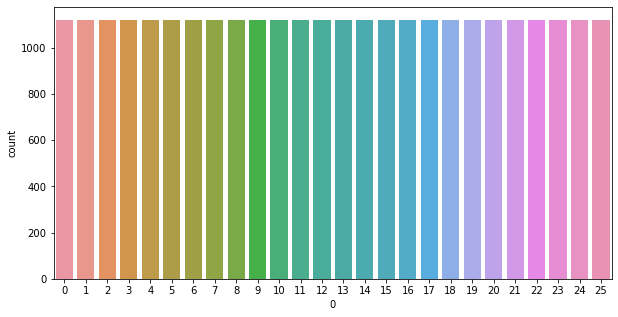

In [8]:
plt.figure(figsize = (10,5))
sns.countplot(y_data)

Now  each class of our data is completly balanced so we can proceed further.

## One hot encoding 'Labels'

In [9]:
print(X_data.head())
print(' ')
print(y_data.head())

   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  ...  0.639  0.640  \
0    0    0    0    0    0    0    0    0    0     0  ...      0      0   
1    0    0    0    0    0    0    0    0    0     0  ...      0      0   
2    0    0    0    0    0    0    0    0    0     0  ...      0      0   
3    0    0    0    0    0    0    0    0    0     0  ...      0      0   
4    0    0    0    0    0    0    0    0    0     0  ...      0      0   

   0.641  0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 784 columns]
 
0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64


In [10]:
lB = LabelBinarizer()
y = lB.fit_transform(y_data)
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [11]:
X_data = X_data / 255
X_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X_data = np.array(X_data)

In [13]:
X_data = X_data.reshape(-1,28,28,1)

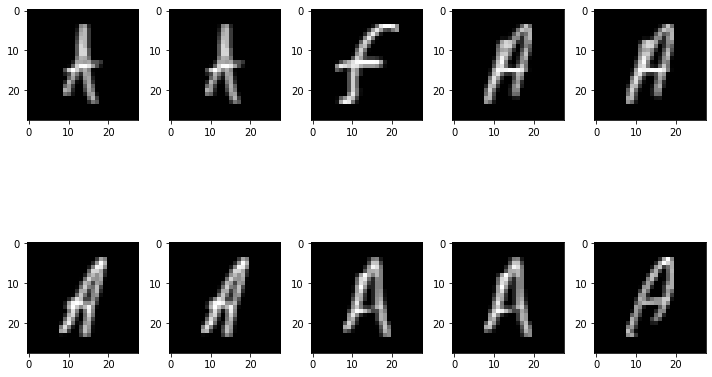

In [14]:
# Showing few images

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_data[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)
X_train.shape, X_test.shape, X_valid.shape, y_train.shape, y_test.shape, y_valid.shape

((18636, 28, 28, 1),
 (5824, 28, 28, 1),
 (4660, 28, 28, 1),
 (18636, 26),
 (5824, 26),
 (4660, 26))

# Data Augmentation
- with data augmentation we can save us from overfitting

In [16]:
dataGen = ImageDataGenerator(rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1)
dataGen.fit(X_train)

In [17]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, 
                                            verbose=1,factor=0.5, min_lr=0.00001)

In [18]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 26 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0

In [20]:
history = model.fit(dataGen.flow(X_train,y_train, batch_size = 128) ,epochs = 5 , 
                    validation_data = (X_valid, y_valid) , 
                    callbacks = [learning_rate_reduction])

Epoch 1/5
146/146 [==============================] - 7s 49ms/step - loss: 0.9720 - accuracy: 0.7146 - val_loss: 2.7886 - val_accuracy: 0.2536
Epoch 2/5
146/146 [==============================] - 6s 40ms/step - loss: 0.2974 - accuracy: 0.9116 - val_loss: 2.3374 - val_accuracy: 0.2356
Epoch 3/5
146/146 [==============================] - 6s 43ms/step - loss: 0.2145 - accuracy: 0.9356 - val_loss: 1.2842 - val_accuracy: 0.5586
Epoch 4/5
146/146 [==============================] - 6s 40ms/step - loss: 0.1697 - accuracy: 0.9499 - val_loss: 0.2501 - val_accuracy: 0.9350
Epoch 5/5
146/146 [==============================] - 6s 44ms/step - loss: 0.1501 - accuracy: 0.9568 - val_loss: 0.1112 - val_accuracy: 0.9695


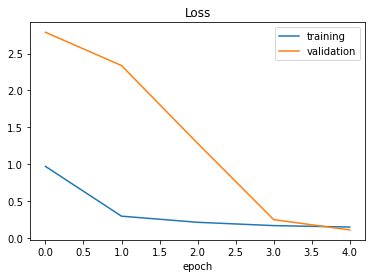

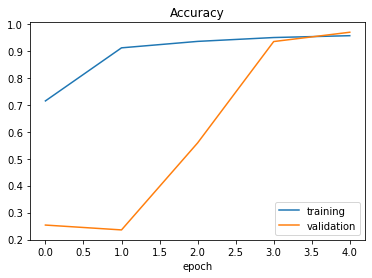

In [21]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [22]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.0958232432603836
Test Accuracy = 0.9733859896659851


In [23]:
className = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E',
             5:'F', 6:'G', 7:'H', 8:'I', 9:'J',
             10:'K', 11:'L', 12:'M', 13:'N', 14:'O',
             15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 
             20:'U', 21:'V', 22:'W', 23:'X', 24:'Y',
             25:'Z'}

## Testing our Model

In [24]:
predictions = model.predict_classes(X_test)
predictions[:5] 

array([11,  1, 14,  6, 17])

In [25]:
y_test[0:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0]])

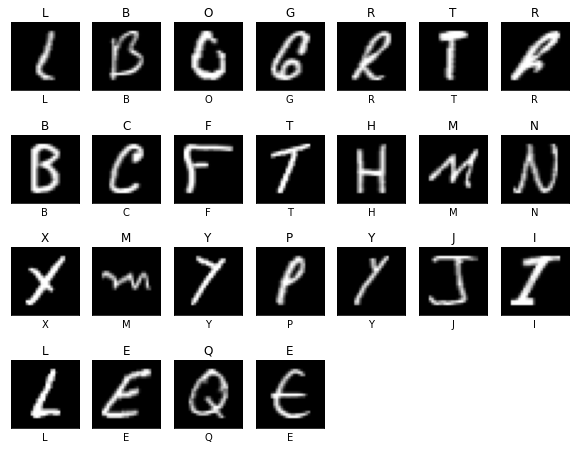

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(className[np.argmax(y_test[i])])
    plt.xlabel(className[predictions[i]])
plt.show()

In [27]:
model.save('Alpha.model')